Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

При кластеризации на основе плотности нам **не нужно задавать количество кластеров** — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

Наиболее популярный алгоритм кластеризации на основе плотности — DBSCAN. Далее мы рассмотрим его подробнее.

DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

Данный алгоритм применим, если:

перед вами стоит задача с данными сложной формы, например выделение районов на карте:

![alt](https://lms.skillfactory.ru/assets/courseware/v1/d0259cffa5d96e024250876cc9c79dd4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_33.png)

в данных большое количество выбросов, например данные медицинских анализов пациентов.

В таких случаях ранее изученный алгоритм k-means не поможет. Зато на помощь придёт DBSCAN.

**Преимущества алгоритма DBSCAN:**

В отличие от k-means, не нужно задавать количество кластеров 
— алгоритм сам определит оптимальное.

Алгоритм хорошо работает с данными произвольной формы.

DBSCAN отлично справляется с выбросами в датасетах.

(подробнее с рисунками в Юните курса)

**Рассмотрим работу алгоритма кластеризации DBSCAN ↓**

Сначала необходимо выбрать случайный объект в данных

Выделим центральные точки (core points).

**Центральными** будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе $r$ от объектов, принадлежащих первому кластеру.

Далее переходим к неразмеченной области в данных

### ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ DBSCAN?

Можно использовать DBSCAN для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести DBSCAN-кластеризацию.

Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от DBSCAN, не выделяют выбросы в отдельные объекты.

Часто DBSCAN применяют для кластеризации геоданных, так как он может выделять данные сложной формы.

Например, на основе статистики заказов такси в пятничный вечер с помощью кластеризации можно выделить районы города, куда можно поехать отдыхать в преддверии выходных. Ваши коллеги из отдела Data Science в компании «Ситимобил» провели такой анализ для Петербурга и получили следующие результаты:

![alt](https://lms.skillfactory.ru/assets/courseware/v1/7702d12d4eb2cb22c85e4ad4e2570a36/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_45.png)

Как мы можем заметить, алгоритм DBSCAN лучше всего справляется с задачей, выделяя сложные участки на карте.

Подробности этого исследования можно посмотреть [тут](https://habr.com/ru/company/citymobil/blog/649063/).

### КАК ЗАПУСТИТЬ DBSCAN В SKLEARN?

Точнее в ноутбуке pokemon

In [ ]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

Основные параметры для запуска **DBSCAN**:

*eps* — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из **важнейших параметров** в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.

*min_samples* — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

![alt](https://lms.skillfactory.ru/assets/courseware/v1/b1650575bdc1bb720ba5f51126a19080/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_46.png)

 В данном случае мы не задавали количество кластеров, алгоритм смог сам разделить данные. Также DBSCAN смог выделить выброс в данных.

### ПРЕИМУЩЕСТВА И НЕДОСТАТКИ DBSCAN

$$Приемущества$$

Не нужно задавать количество кластеров.

Устойчив к шуму и выбросам, может находить выбросы в данных.

Способен найти кластеры любой геометрической формы

$$Недостатки$$

Не может качественно кластеризовать наборы данных с большой разницей в плотности.

Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.

Бывает сложно подобрать eps.


### Таблица в юните

Итак, мы рассмотрели наиболее популярные алгоритмы кластеризации. Давайте подведём итог и соберём основную информацию по разным видам кластеризации в таблицу:

Задание 7.4

Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?

In [1]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('data/housing.csv')

In [3]:
data

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806
...,...,...
1350,12.580032,10.122039
1351,12.488949,9.934954
1352,10.693618,12.083653
1353,12.455530,10.304081


DBSCAN()

<AxesSubplot:xlabel='year', ylabel='price'>

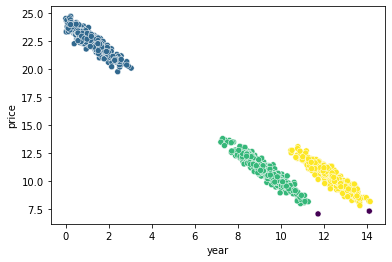

In [29]:
import seaborn as sns 
from sklearn.cluster import DBSCAN

# clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])


cluster_hous = DBSCAN()
cluster_hous.fit(data[['year', 'price']])
sns.scatterplot(x=data.year, y=data.price, c=cluster_hous.labels_)

Задание 7.5

В предыдущем задании алгоритм DBSCAN ошибочно определил точку у жёлтого кластера как выброс. Так произошло потому, что алгоритм запускался с параметрами по умолчанию.

Какие значения параметров eps и min_samples подойдут для верной кластеризации данных?

A eps = 0.5, min_samples = 5

B eps = 0.7, min_samples = 6 верно

C eps = 0.7, min_samples = 5 верно

D eps = 1.15, min_samples = 2

DBSCAN(eps=0.7, min_samples=6)

<AxesSubplot:xlabel='year', ylabel='price'>

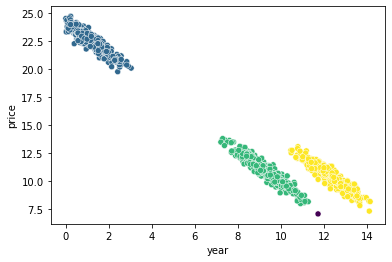

In [30]:
cluster_hous = DBSCAN(eps = 0.7, min_samples = 6)
cluster_hous.fit(data[['year', 'price']])
sns.scatterplot(x=data.year, y=data.price, c=cluster_hous.labels_)